<h1 align=center><font size = 5>Segmenting and Clustering Neighborhoods in Paris</font></h1>

In [1]:
from bs4 import BeautifulSoup 
import requests # library to handle requests

import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

! pip install folium==0.5.0
import folium

print('Libraries imported.')

     |████████████████████████████████| 79 kB 7.8 MB/s  eta 0:00:01
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76240 sha256=1a1d78d2cc0681f7a638354a9879edaed9de8d419b288d5884368976c636756c
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/b2/2f/2c/109e446b990d663ea5ce9b078b5e7c1a9c45cca91f377080f8
Successfully built folium
Libraries imported.


In [2]:
url = "https://en.wikipedia.org/wiki/Arrondissements_of_Paris"
html_content = requests.get(url).text
soup = BeautifulSoup(html_content, "lxml")

# find the table 

My_table = soup.find('table', class_='wikitable')
table_A = []
#table_B = []
for tr in My_table.findAll('tr'):
    td = tr.find_all('td')
    if len(td)==7:
        row = [i.text for i in td]
        table_A.append(row)

# define the dataframe columns
column_names = ['Arrondissements', 'Name', 'Area','Population','Density','Peak of Population','Mayor']

# instantiate the dataframe
df = pd.DataFrame(table_A, columns=column_names)

# simplify the data
df_new=df.drop(['Density','Peak of Population','Mayor'], axis=1)


#restore the data for length!=7 into a new dataframe
dict = {'Arrondissements':['2nd (IIe) RAdministratively part of Paris Centre', '3rd (IIIe) RAdministratively part of Paris Centre', '4th (IVe) RAdministratively part of Paris Centre'], 
        'Name':['Bourse', 'Temple', 'Hôtel-de-Ville'], 
        'Area':['5.59 km2 (2.16 sq mi)','5.59 km2 (2.16 sq mi)','5.59 km2 (2.16 sq mi)'],
        'Population':['100,196','100,196','100,196'],
       } 
df2 = pd.DataFrame(dict)

# insert the dataframe between the 1st line and the 2nd line, becoming the new dataframe
df3=pd.concat([df_new.iloc[:1],df2, df_new.iloc[1:]]).reset_index(drop = True)
df3


,Arrondissements,Name,Area,Population
0,1st(Ier) RAdministratively part of Paris Centre,Louvre,5.59 km2 (2.16 sq mi),"100,196"
1,2nd (IIe) RAdministratively part of Paris Centre,Bourse,5.59 km2 (2.16 sq mi),"100,196"
2,3rd (IIIe) RAdministratively part of Paris Centre,Temple,5.59 km2 (2.16 sq mi),"100,196"
3,4th (IVe) RAdministratively part of Paris Centre,Hôtel-de-Ville,5.59 km2 (2.16 sq mi),"100,196"
4,5th (Ve) L,Panthéon,2.541 km2 (0.981 sq mi),"59,631"
5,6th (VIe) L,Luxembourg,2.154 km2 (0.832 sq mi),"41,976"
6,7th (VIIe) L,Palais-Bourbon,4.088 km2 (1.578 sq mi),"52,193"
7,8th (VIIIe) R,Élysée,3.881 km2 (1.498 sq mi),"37,368"
8,9th (IXe) R,Opéra,2.179 km2 (0.841 sq mi),"60,071"
9,10th (Xe) R,Entrepôt,2.892 km2 (1.117 sq mi),"90,836"


In [3]:
geolocator = Nominatim(user_agent='myGeocoder')
df3['Coor'] = df3['Name'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df3[['Latitude','Longitude']] = df3['Coor'].apply(pd.Series)
df3.drop(['Coor'], axis=1, inplace=True)
df3

,Arrondissements,Name,Area,Population,Latitude,Longitude
0,1st(Ier) RAdministratively part of Paris Centre,Louvre,5.59 km2 (2.16 sq mi),"100,196",48.861147,2.338028
1,2nd (IIe) RAdministratively part of Paris Centre,Bourse,5.59 km2 (2.16 sq mi),"100,196",48.868630,2.341474
2,3rd (IIIe) RAdministratively part of Paris Centre,Temple,5.59 km2 (2.16 sq mi),"100,196",31.098207,-97.342785
3,4th (IVe) RAdministratively part of Paris Centre,Hôtel-de-Ville,5.59 km2 (2.16 sq mi),"100,196",43.949283,4.805260
4,5th (Ve) L,Panthéon,2.541 km2 (0.981 sq mi),"59,631",41.898616,12.476833
5,6th (VIe) L,Luxembourg,2.154 km2 (0.832 sq mi),"41,976",49.815868,6.129675
6,7th (VIIe) L,Palais-Bourbon,4.088 km2 (1.578 sq mi),"52,193",48.861596,2.317909
7,8th (VIIIe) R,Élysée,3.881 km2 (1.498 sq mi),"37,368",4.753042,-54.044953
8,9th (IXe) R,Opéra,2.179 km2 (0.841 sq mi),"60,071",48.876019,2.339962
9,10th (Xe) R,Entrepôt,2.892 km2 (1.117 sq mi),"90,836",48.876126,2.359839


In [4]:
address = 'Paris'

geolocator = Nominatim(user_agent="paris_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Paris are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Paris are 48.8566969, 2.3514616.


Since the geograpical coordinate of Paris are 48.8611473, 2.33802768704666. Latitude and Longtitude seems wrong for those Arrondissements far away from 48.8566969, 2.3514616

In [5]:
# create the column of new name by adding prefix Paris and find the corresponding latitude and longitude by the new name to get the correct coordinates
geolocator = Nominatim(user_agent='myGeocoder')
df3['New Name'] = 'Paris ' + df3['Name'].astype(str)
df3['Coor'] = df3['New Name'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df3[['Latitude','Longitude']] = df3['Coor'].apply(pd.Series)

# drop the Coor and New Name to make the dataframe clean
df3.drop(['Coor'], axis=1, inplace=True)
df3.drop(['New Name'], axis=1, inplace=True)
df3

,Arrondissements,Name,Area,Population,Latitude,Longitude
0,1st(Ier) RAdministratively part of Paris Centre,Louvre,5.59 km2 (2.16 sq mi),"100,196",48.864718,2.343805
1,2nd (IIe) RAdministratively part of Paris Centre,Bourse,5.59 km2 (2.16 sq mi),"100,196",48.869756,2.341488
2,3rd (IIIe) RAdministratively part of Paris Centre,Temple,5.59 km2 (2.16 sq mi),"100,196",48.865613,2.360905
3,4th (IVe) RAdministratively part of Paris Centre,Hôtel-de-Ville,5.59 km2 (2.16 sq mi),"100,196",48.856821,2.352301
4,5th (Ve) L,Panthéon,2.541 km2 (0.981 sq mi),"59,631",48.846191,2.346079
5,6th (VIe) L,Luxembourg,2.154 km2 (0.832 sq mi),"41,976",48.850433,2.332951
6,7th (VIIe) L,Palais-Bourbon,4.088 km2 (1.578 sq mi),"52,193",48.860920,2.318035
7,8th (VIIIe) R,Élysée,3.881 km2 (1.498 sq mi),"37,368",48.846644,2.369830
8,9th (IXe) R,Opéra,2.179 km2 (0.841 sq mi),"60,071",48.872138,2.330630
9,10th (Xe) R,Entrepôt,2.892 km2 (1.117 sq mi),"90,836",48.876126,2.359839


In [6]:
# create map of Paris using latitude and longitude values
map_paris = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df3['Latitude'], df3['Longitude'], df3['Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_paris)  
    
map_paris

Utilizing the Foursquare API to explore the Arrondissements and segment them.

#### Define Foursquare Credentials and Version


In [7]:
CLIENT_ID = '4DBS44JI1BC3QVNDIE1UZPFDFE2OSZJZKJOUJKQUGQKNPQ5M' # your Foursquare ID
CLIENT_SECRET = 'XCF4J5WZ0TFL0OYP1C2RIWLHE4YAPK1WFGAKSPQR01UBGZNO' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

Get the Arrondissement's name.

In [12]:
df3.loc[0, 'Name']

'Louvre'

In [13]:
neighborhood_latitude = df3.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df3.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df3.loc[0, 'Name'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Louvre are 48.864717999999996, 2.343804869653174.


Now, let's get the top 100 venues that are in Louvre within a radius of 500 meters.

In [14]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

Send the GET request and examine the resutls

In [15]:
results = requests.get(url).json()

In [16]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [17]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,Le Louis,French Restaurant,48.864331,2.341332
1,Filakia,Souvlaki Shop,48.865646,2.345619
2,Le Comptoir de la Gastronomie,French Restaurant,48.864555,2.345259
3,Place des Victoires,Plaza,48.865759,2.341219
4,Spa Nuxe,Spa,48.864017,2.346650


In [18]:
print('{} unique venues were returned by Foursquare.'.format(nearby_venues['categories'].value_counts().shape[0]))

58 unique venues were returned by Foursquare.


In [19]:
print(nearby_venues['categories'].value_counts())

French Restaurant               15
Bakery                           6
Wine Bar                         5
Italian Restaurant               5
Cocktail Bar                     5
Spa                              2
Pastry Shop                      2
Chinese Restaurant               2
Japanese Restaurant              2
Tea Room                         2
Pedestrian Plaza                 2
Restaurant                       2
Sandwich Place                   2
Cheese Shop                      2
Optical Shop                     2
Café                             2
Furniture / Home Store           1
Toy / Game Store                 1
Concert Hall                     1
Theater                          1
Creperie                         1
Asian Restaurant                 1
Bistro                           1
Women's Store                    1
Grocery Store                    1
Juice Bar                        1
Donut Shop                       1
Bookstore                        1
Gym / Fitness Center

In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [21]:
# type your answer here
paris_venues = getNearbyVenues(names=df3['Name'],
                                   latitudes=df3['Latitude'],
                                   longitudes=df3['Longitude']
                                  )

Louvre
Bourse
Temple
Hôtel-de-Ville
Panthéon
Luxembourg
Palais-Bourbon
Élysée
Opéra
Entrepôt
Popincourt
Reuilly
Gobelins
Observatoire
Vaugirard
Passy
Batignolles-Monceau
Butte-Montmartre
Buttes-Chaumont
Ménilmontant


In [22]:
print(paris_venues.shape)
paris_venues.head()

(1357, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Louvre,48.864718,2.343805,Le Louis,48.864331,2.341332,French Restaurant
1,Louvre,48.864718,2.343805,Filakia,48.865646,2.345619,Souvlaki Shop
2,Louvre,48.864718,2.343805,Le Comptoir de la Gastronomie,48.864555,2.345259,French Restaurant
3,Louvre,48.864718,2.343805,Place des Victoires,48.865759,2.341219,Plaza
4,Louvre,48.864718,2.343805,Spa Nuxe,48.864017,2.346650,Spa


In [23]:
paris_venues_only_restaurant = paris_venues[paris_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
paris_venues_only_restaurant.index = np.arange(1, len(paris_venues_only_restaurant)+1)
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", paris_venues_only_restaurant.shape)
paris_venues_only_restaurant

Shape of the Data-Frame with Venue Category only Restaurant:  (462, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Louvre,48.864718,2.343805,Le Louis,48.864331,2.341332,French Restaurant
2,Louvre,48.864718,2.343805,Le Comptoir de la Gastronomie,48.864555,2.345259,French Restaurant
3,Louvre,48.864718,2.343805,Les Fines Gueules,48.865172,2.340645,French Restaurant
4,Louvre,48.864718,2.343805,Le Pot de Vins,48.864322,2.340193,Restaurant
5,Louvre,48.864718,2.343805,La Cevicheria,48.866192,2.345474,Peruvian Restaurant
...,...,...,...,...,...,...,...
458,Ménilmontant,48.867716,2.383701,Le Vieux Belleville,48.871660,2.386255,French Restaurant
459,Ménilmontant,48.867716,2.383701,Sürpriz,48.865841,2.378772,Kebab Restaurant
460,Ménilmontant,48.867716,2.383701,Chez Ramona,48.871197,2.379765,Spanish Restaurant
461,Ménilmontant,48.867716,2.383701,Greenhouse,48.865114,2.382354,Vegetarian / Vegan Restaurant


See the Restaurants in Paris.

In [24]:
# create map of Paris using latitude and longitude values
map_paris_restaurant = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(paris_venues_only_restaurant['Venue Latitude'], paris_venues_only_restaurant['Venue Longitude'], 
                           paris_venues_only_restaurant['Venue Category']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_paris_restaurant)  
    
map_paris_restaurant

In [25]:
print('There are {} uniques categories.'.format(len(paris_venues_only_restaurant['Venue Category'].unique())))

There are 55 uniques categories.


Let's check the frequency of each categories.

In [26]:
paris_venues_only_restaurant['Venue Category'].value_counts().head(10)

French Restaurant        173
Italian Restaurant        56
Japanese Restaurant       30
Restaurant                20
Vietnamese Restaurant     16
Thai Restaurant           14
Indian Restaurant         12
Lebanese Restaurant       10
Asian Restaurant          10
Seafood Restaurant        10
Name: Venue Category, dtype: int64

In [27]:
# create a dataframe of top 10 categories
Paris_Venues_Top10 = paris_venues['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
Paris_Venues_Top10=Paris_Venues_Top10.reset_index()
#Tokyo_5_Dist_Venues_Top10

Paris_Venues_Top10.rename(index=str, columns={"index": "Venue Category", "frequency": "Frequency"}, inplace=True)
Paris_Venues_Top10

,Venue Category,Frequency
0,French Restaurant,173
1,Hotel,77
2,Bar,63
3,Italian Restaurant,56
4,Bakery,41
5,Coffee Shop,30
6,Japanese Restaurant,30
7,Plaza,29
8,Café,29
9,Bistro,28


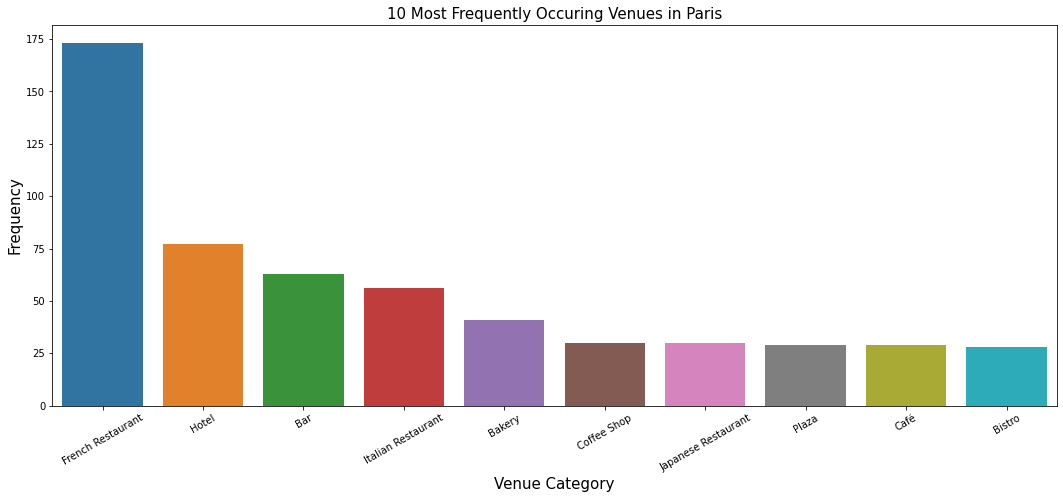

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue Category", y="Frequency", data=Paris_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('10 Most Frequently Occuring Venues in Paris', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues.png", dpi=300)
plt.show()

In [29]:
# one hot encoding
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
paris_onehot['Neighborhood'] = paris_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot.head()

,Neighborhood,African Restaurant,Alsatian Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Louvre,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Louvre,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Louvre,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Louvre,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Louvre,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
paris_onehot.shape

(1357, 204)

In [31]:
paris_grouped = paris_onehot.groupby('Neighborhood').mean().reset_index()
paris_grouped

,Neighborhood,African Restaurant,Alsatian Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Batignolles-Monceau,0.000000,0.00,0.000000,0.000000,0.000000,0.022222,0.022222,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022222
1,Bourse,0.000000,0.00,0.000000,0.011236,0.011236,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.056180,0.011236,0.011236,0.000000
2,Butte-Montmartre,0.000000,0.00,0.000000,0.000000,0.014706,0.014706,0.000000,0.000000,0.014706,...,0.00,0.000000,0.000000,0.014706,0.000000,0.000000,0.014706,0.000000,0.000000,0.000000
3,Buttes-Chaumont,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Entrepôt,0.020000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,...,0.00,0.000000,0.000000,0.010000,0.000000,0.000000,0.010000,0.020000,0.000000,0.000000
5,Gobelins,0.000000,0.00,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.060000,0.000000,0.000000,0.000000,0.000000
6,Hôtel-de-Ville,0.000000,0.01,0.000000,0.000000,0.000000,0.030000,0.010000,0.010000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,0.000000,0.000000,0.000000
7,Louvre,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,...,0.01,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.010000,0.010000,0.000000
8,Luxembourg,0.000000,0.00,0.034483,0.000000,0.000000,0.017241,0.017241,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.051724,0.000000,0.000000,0.000000
9,Ménilmontant,0.020408,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.020408,0.000000,0.020408,0.000000,0.000000,0.000000,0.000000


In [32]:
paris_grouped.shape

(20, 204)

In [33]:
num_top_venues = 5

for hood in paris_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = paris_grouped[paris_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Batignolles-Monceau----
               venue  freq
0  French Restaurant  0.20
1              Hotel  0.07
2                Bar  0.04
3       Burger Joint  0.04
4     Sandwich Place  0.04


----Bourse----
               venue  freq
0  French Restaurant  0.09
1           Wine Bar  0.06
2              Hotel  0.06
3       Cocktail Bar  0.06
4   Pedestrian Plaza  0.04


----Butte-Montmartre----
                venue  freq
0   French Restaurant  0.16
1                 Bar  0.16
2  Italian Restaurant  0.04
3              Bistro  0.04
4                Café  0.04


----Buttes-Chaumont----
                 venue  freq
0    French Restaurant  0.17
1  Japanese Restaurant  0.08
2                Plaza  0.08
3          Supermarket  0.08
4          Pizza Place  0.08


----Entrepôt----
               venue  freq
0  French Restaurant  0.11
1              Hotel  0.07
2             Bistro  0.05
3        Coffee Shop  0.04
4               Café  0.04


----Gobelins----
                   venue  freq
0    

In [34]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [35]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = paris_grouped['Neighborhood']

for ind in np.arange(paris_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Batignolles-Monceau,French Restaurant,Hotel,Bar,Sandwich Place,Burger Joint,Yoga Studio,Salon / Barbershop,Salad Place,Cocktail Bar,Pool
1,Bourse,French Restaurant,Cocktail Bar,Wine Bar,Hotel,Pedestrian Plaza,Japanese Restaurant,Creperie,Bookstore,Bistro,Italian Restaurant
2,Butte-Montmartre,Bar,French Restaurant,Café,Bistro,Italian Restaurant,Middle Eastern Restaurant,Japanese Restaurant,Sandwich Place,Pizza Place,Convenience Store
3,Buttes-Chaumont,French Restaurant,Japanese Restaurant,Supermarket,Pizza Place,Plaza,Pool,Bus Stop,Steakhouse,Sandwich Place,Grocery Store
4,Entrepôt,French Restaurant,Hotel,Bistro,Café,Coffee Shop,Restaurant,Pizza Place,Bar,Indian Restaurant,Cocktail Bar


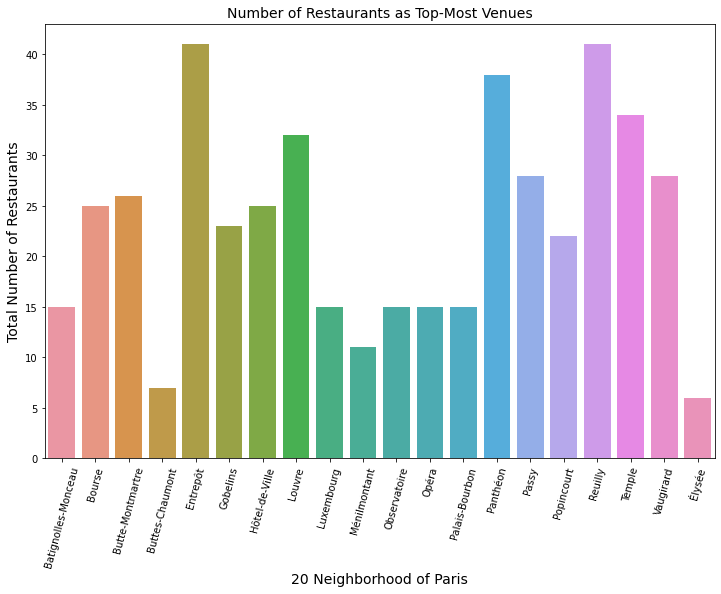

           Neighborhood  Number of Restaurant
1   Batignolles-Monceau                    15
2                Bourse                    25
3      Butte-Montmartre                    26
4       Buttes-Chaumont                     7
5              Entrepôt                    41
6              Gobelins                    23
7        Hôtel-de-Ville                    25
8                Louvre                    32
9            Luxembourg                    15
10         Ménilmontant                    11
11         Observatoire                    15
12                Opéra                    15
13       Palais-Bourbon                    15
14             Panthéon                    38
15                Passy                    28
16           Popincourt                    22
17              Reuilly                    41
18               Temple                    34
19            Vaugirard                    28
20               Élysée                     6


In [36]:
#try groupby to play with restaurant 
paris_Venues_restaurant = paris_venues.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())
paris_Venues_restaurant_df = paris_Venues_restaurant.to_frame().reset_index()
paris_Venues_restaurant_df.columns = ['Neighborhood', 'Number of Restaurant']
paris_Venues_restaurant_df.index = np.arange(1, len(paris_Venues_restaurant_df)+1)

list_rest_no = paris_Venues_restaurant_df['Number of Restaurant'].to_list()

fig = plt.figure(figsize=(12,8))
bar = sns.barplot(x='Neighborhood', y='Number of Restaurant', data=paris_Venues_restaurant_df)

bar.set_ylabel("Total Number of Restaurants", fontsize=14)
bar.set_xlabel("20 Neighborhood of Paris", fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=75)
bar.set_title("Number of Restaurants as Top-Most Venues", fontsize=14)
plt.show()
print(paris_Venues_restaurant_df)

## Cluster Neighborhoods

Run _k_-means to cluster the neighborhood into 5 clusters.

In [157]:
# set number of clusters
kclusters = 5

paris_grouped_clustering = paris_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(paris_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 1, 2, 0, 1, 2, 1, 1, 1, 3], dtype=int32)

In [158]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

paris_merged = df3

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
paris_merged = paris_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Name')

paris_merged # check the last columns!

,Arrondissements,Name,Area,Population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1st(Ier) RAdministratively part of Paris Centre,Louvre,5.59 km2 (2.16 sq mi),"100,196",48.864718,2.343805,1,French Restaurant,Bakery,Wine Bar,Cocktail Bar,Italian Restaurant,Sandwich Place,Optical Shop,Café,Spa,Pastry Shop
1,2nd (IIe) RAdministratively part of Paris Centre,Bourse,5.59 km2 (2.16 sq mi),"100,196",48.869756,2.341488,1,French Restaurant,Wine Bar,Hotel,Cocktail Bar,Pedestrian Plaza,Japanese Restaurant,Creperie,Concert Hall,Bookstore,Bistro
2,3rd (IIIe) RAdministratively part of Paris Centre,Temple,5.59 km2 (2.16 sq mi),"100,196",48.865613,2.360905,1,French Restaurant,Hotel,Wine Bar,Art Gallery,Vietnamese Restaurant,Italian Restaurant,Japanese Restaurant,Restaurant,Bakery,Sandwich Place
3,4th (IVe) RAdministratively part of Paris Centre,Hôtel-de-Ville,5.59 km2 (2.16 sq mi),"100,196",48.856821,2.352301,1,French Restaurant,Ice Cream Shop,Historic Site,Hotel,Plaza,Coffee Shop,Wine Bar,Art Gallery,Italian Restaurant,Pastry Shop
4,5th (Ve) L,Panthéon,2.541 km2 (0.981 sq mi),"59,631",48.846191,2.346079,2,French Restaurant,Bar,Hotel,Bakery,Italian Restaurant,Indie Movie Theater,Café,Pub,Burger Joint,Plaza
5,6th (VIe) L,Luxembourg,2.154 km2 (0.832 sq mi),"41,976",48.850433,2.332951,1,Plaza,French Restaurant,Italian Restaurant,Wine Bar,Café,American Restaurant,Fountain,Chocolate Shop,Bakery,Lebanese Restaurant
6,7th (VIIe) L,Palais-Bourbon,4.088 km2 (1.578 sq mi),"52,193",48.860920,2.318035,0,French Restaurant,Hotel,Plaza,Café,Italian Restaurant,Park,Coffee Shop,Pedestrian Plaza,Beer Garden,Train Station
7,8th (VIIIe) R,Élysée,3.881 km2 (1.498 sq mi),"37,368",48.846644,2.369830,1,Hotel,Sandwich Place,French Restaurant,Bakery,Train Station,Hotel Bar,Coffee Shop,Italian Restaurant,Rental Car Location,Park
8,9th (IXe) R,Opéra,2.179 km2 (0.841 sq mi),"60,071",48.872138,2.330630,1,Hotel,Clothing Store,French Restaurant,Department Store,Italian Restaurant,Salad Place,Vietnamese Restaurant,Sandwich Place,Men's Store,Gourmet Shop
9,10th (Xe) R,Entrepôt,2.892 km2 (1.117 sq mi),"90,836",48.876126,2.359839,1,French Restaurant,Hotel,Bistro,Café,Coffee Shop,Restaurant,Bar,Pizza Place,Indian Restaurant,Fast Food Restaurant


In [159]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
Arrondissements = paris_Venues_restaurant_df['Neighborhood'].values.tolist()


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(paris_merged['Latitude'], paris_merged['Longitude'], paris_merged['Name'], paris_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[Arrondissements.index(poi)]*0.5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Red Cluster 

In [160]:
paris_merged.loc[paris_merged['Cluster Labels'] == 0, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Name,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Palais-Bourbon,2.318035,0,French Restaurant,Hotel,Plaza,Café,Italian Restaurant,Park,Coffee Shop,Pedestrian Plaza,Beer Garden,Train Station
18,Buttes-Chaumont,2.390535,0,French Restaurant,Pizza Place,Plaza,Supermarket,Japanese Restaurant,Farmers Market,Grocery Store,Doner Restaurant,Metro Station,Spa


Purple Cluster

In [161]:
paris_merged.loc[paris_merged['Cluster Labels'] == 1, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Name,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Louvre,2.343805,1,French Restaurant,Bakery,Wine Bar,Cocktail Bar,Italian Restaurant,Sandwich Place,Optical Shop,Café,Spa,Pastry Shop
1,Bourse,2.341488,1,French Restaurant,Wine Bar,Hotel,Cocktail Bar,Pedestrian Plaza,Japanese Restaurant,Creperie,Concert Hall,Bookstore,Bistro
2,Temple,2.360905,1,French Restaurant,Hotel,Wine Bar,Art Gallery,Vietnamese Restaurant,Italian Restaurant,Japanese Restaurant,Restaurant,Bakery,Sandwich Place
3,Hôtel-de-Ville,2.352301,1,French Restaurant,Ice Cream Shop,Historic Site,Hotel,Plaza,Coffee Shop,Wine Bar,Art Gallery,Italian Restaurant,Pastry Shop
5,Luxembourg,2.332951,1,Plaza,French Restaurant,Italian Restaurant,Wine Bar,Café,American Restaurant,Fountain,Chocolate Shop,Bakery,Lebanese Restaurant
7,Élysée,2.369830,1,Hotel,Sandwich Place,French Restaurant,Bakery,Train Station,Hotel Bar,Coffee Shop,Italian Restaurant,Rental Car Location,Park
8,Opéra,2.330630,1,Hotel,Clothing Store,French Restaurant,Department Store,Italian Restaurant,Salad Place,Vietnamese Restaurant,Sandwich Place,Men's Store,Gourmet Shop
9,Entrepôt,2.359839,1,French Restaurant,Hotel,Bistro,Café,Coffee Shop,Restaurant,Bar,Pizza Place,Indian Restaurant,Fast Food Restaurant


Blue Cluster

In [162]:
paris_merged.loc[paris_merged['Cluster Labels'] == 2, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Name,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Panthéon,2.346079,2,French Restaurant,Bar,Hotel,Bakery,Italian Restaurant,Indie Movie Theater,Café,Pub,Burger Joint,Plaza
10,Popincourt,2.374111,2,French Restaurant,Bar,Cocktail Bar,Bistro,Pizza Place,Coffee Shop,Restaurant,Pub,Record Shop,Sandwich Place
11,Reuilly,2.387074,2,French Restaurant,Bar,Hotel,Restaurant,Supermarket,Japanese Restaurant,Bakery,Vietnamese Restaurant,Italian Restaurant,Brasserie
12,Gobelins,2.355583,2,Hotel,Thai Restaurant,Vietnamese Restaurant,Bar,French Restaurant,Indian Restaurant,Italian Restaurant,Bakery,Mexican Restaurant,Gaming Cafe
14,Vaugirard,2.300383,2,French Restaurant,Hotel,Italian Restaurant,Coffee Shop,Bar,Supermarket,Lebanese Restaurant,Gym / Fitness Center,Japanese Restaurant,Park
15,Passy,2.276347,2,French Restaurant,Italian Restaurant,Hotel,Bakery,Japanese Restaurant,Clothing Store,Supermarket,Bar,Movie Theater,Seafood Restaurant
16,Batignolles-Monceau,2.308593,2,French Restaurant,Hotel,Burger Joint,Bar,Park,Café,Sandwich Place,Salon / Barbershop,Salad Place,Cocktail Bar
17,Butte-Montmartre,2.346467,2,French Restaurant,Bar,Bistro,Café,Italian Restaurant,Middle Eastern Restaurant,Japanese Restaurant,Sandwich Place,Convenience Store,Pizza Place


Green Cluster

In [163]:
paris_merged.loc[paris_merged['Cluster Labels'] == 3, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Name,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Ménilmontant,2.383701,3,Bar,Pizza Place,Italian Restaurant,Burger Joint,Café,French Restaurant,Cocktail Bar,African Restaurant,Park,Brewery


Yellow Cluster

In [164]:
paris_merged.loc[paris_merged['Cluster Labels'] == 4, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Name,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Observatoire,2.323962,4,French Restaurant,Hotel,Bakery,Pizza Place,Bus Stop,Fast Food Restaurant,Food & Drink Shop,Brasserie,Bistro,Sushi Restaurant
